In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Building a classification model based on Make_Moons from scikit learn

In [21]:
# Import the dataset
from sklearn.datasets import make_moons

n_samples = 1000
X, y = make_moons(n_samples=n_samples, noise=0.2, random_state=42)

# Inspect the data
X, y
# y indicates that we are dealing with binary classification 0 or 1

(array([[-0.11166654,  0.52022374],
        [ 1.14264982, -0.34257734],
        [ 0.79555796, -0.01144231],
        ...,
        [ 1.72760808, -0.42882943],
        [-1.01448644,  0.13522904],
        [ 0.77438101,  0.63428493]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [22]:
X.shape, y.shape

((1000, 2), (1000,))

In [23]:
# Split the data into test and training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#inspect the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [24]:
X_train

array([[ 2.13965802,  0.37314783],
       [-1.20665488,  0.41689764],
       [-0.21171309,  1.17153886],
       ...,
       [-0.86990505,  0.48557797],
       [ 1.14630776,  0.19416331],
       [ 1.94143074,  0.14949156]])

Text(0.5, 1.0, 'make_moons')

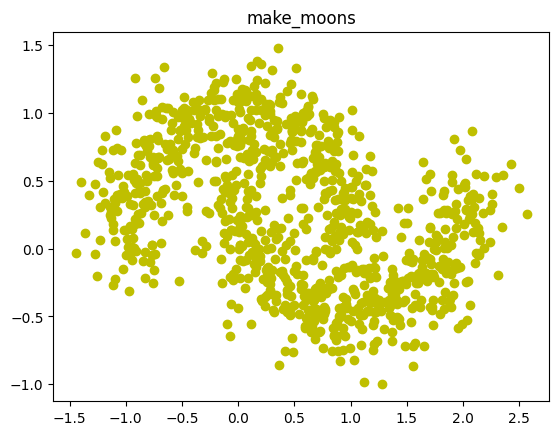

In [28]:
# Let's try plotting the data because why a scatter plot though
plt.scatter(X[:, 0], X[:, 1], c='y')
plt.title("make_moons")

# Let's now build the model

In [30]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_moon = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

# 2. Compile the model
model_moon.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
history_moon = model_moon.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5025 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6937 - learning_rate: 1.0000e-04
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5025 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6934 - learning_rate: 1.1220e-04
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5025 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6931 - learning_rate: 1.2589e-04
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5025 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6928 - learning_rate: 1.4125e-04
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5028 - loss: 0.6928 - val_accuracy: 0.5050 - val_loss: 0.6924 - learning_rate: 1.5849e-04
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5138 - loss: 0.6923 - val_accuracy: 0.5250 - val_loss: 0.6920 - learning_rate: 1.7783e-04
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5336 - loss

In [ ]:
# 4. Evaluate the model
model_moon.evaluate(X_test, y_test)

<Axes: title={'center': 'Finding the learning rate'}>

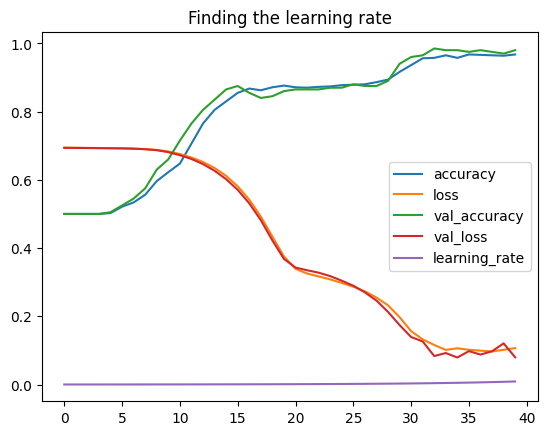

In [31]:
# Check the data and plot to find the learning rate

pd.DataFrame(history_moon.history).plot(title="Finding the learning rate")

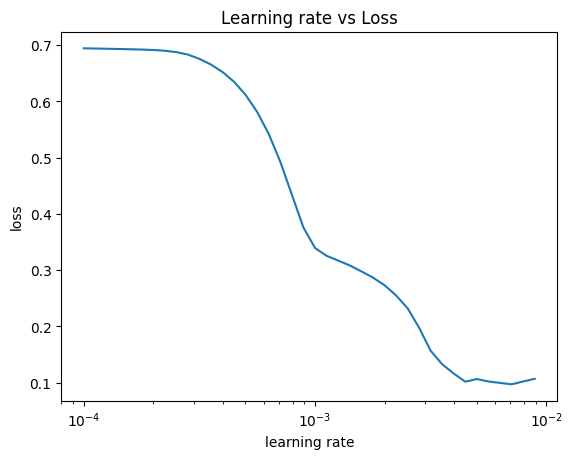

In [36]:
# Plotting just the loss to find the learning rate on the x axis
lrs = 1e-4 * 10 ** (tf.range(40) / 20)
plt.semilogx(lrs, history_moon.history['loss'])
plt.title("Learning rate vs Loss")
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.show();

In [39]:
10**-2, 10**-3, 1e-4,

(0.01, 0.001, 0.0001)

# Experiment 1

In [40]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_moon = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Early stopping callback to stop the model when it is not improving after 5 epochs
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

# 2. Compile the model
model_moon.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.004),
    metrics=['accuracy']
)

# 3. Fit the model
history_moon = model_moon.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test), callbacks=early_stop)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5481 - loss: 0.6645 - val_accuracy: 0.8000 - val_loss: 0.5504
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8268 - loss: 0.5133 - val_accuracy: 0.8400 - val_loss: 0.4371
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8407 - loss: 0.4229 - val_accuracy: 0.8500 - val_loss: 0.3580
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8543 - loss: 0.3552 - val_accuracy: 0.8750 - val_loss: 0.3063
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8660 - loss: 0.3136 - val_accuracy: 0.8950 - val_loss: 0.2788
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8761 - loss: 0.2928 - val_accuracy: 0.9200 - val_loss: 0.2468
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8879 - loss: 0.2633 - val_accuracy: 0.9400 - val_loss: 0.2099
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9058 - loss: 0.2214 - val_accuracy: 0.9400 - val_loss

In [41]:
# 4. Evaluate the model
model_moon.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9849 - loss: 0.0356


[0.04638398066163063, 0.9750000238418579]

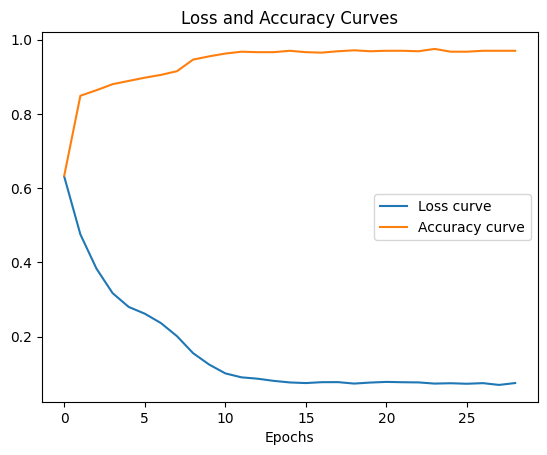

In [45]:
# Plot to see the loss and accuracy curves
#plt.figure(figsize=(5, 7))
plt.plot(history_moon.history['loss'], label="Loss curve")
plt.plot(history_moon.history['accuracy'], label="Accuracy curve")
plt.xlabel("Epochs")
plt.legend()
plt.title("Loss and Accuracy Curves");

# Make a confusion matrix

In [52]:
# Make predictions with the model first
y_pred = model_moon.predict(X_test)
y_pred = tf.squeeze(tf.round(y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm

array([[98,  2],
       [ 3, 97]])

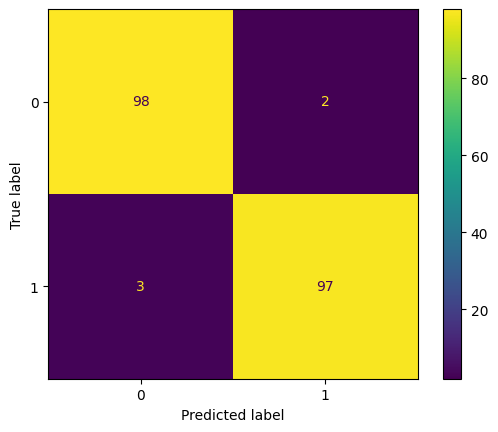

In [54]:
# Displaying the confusion matrix in a nicer way
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show();

In [55]:
model_moon.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 707 (2.77 KB)

 Trainable params: 235 (940.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 472 (1.85 KB)

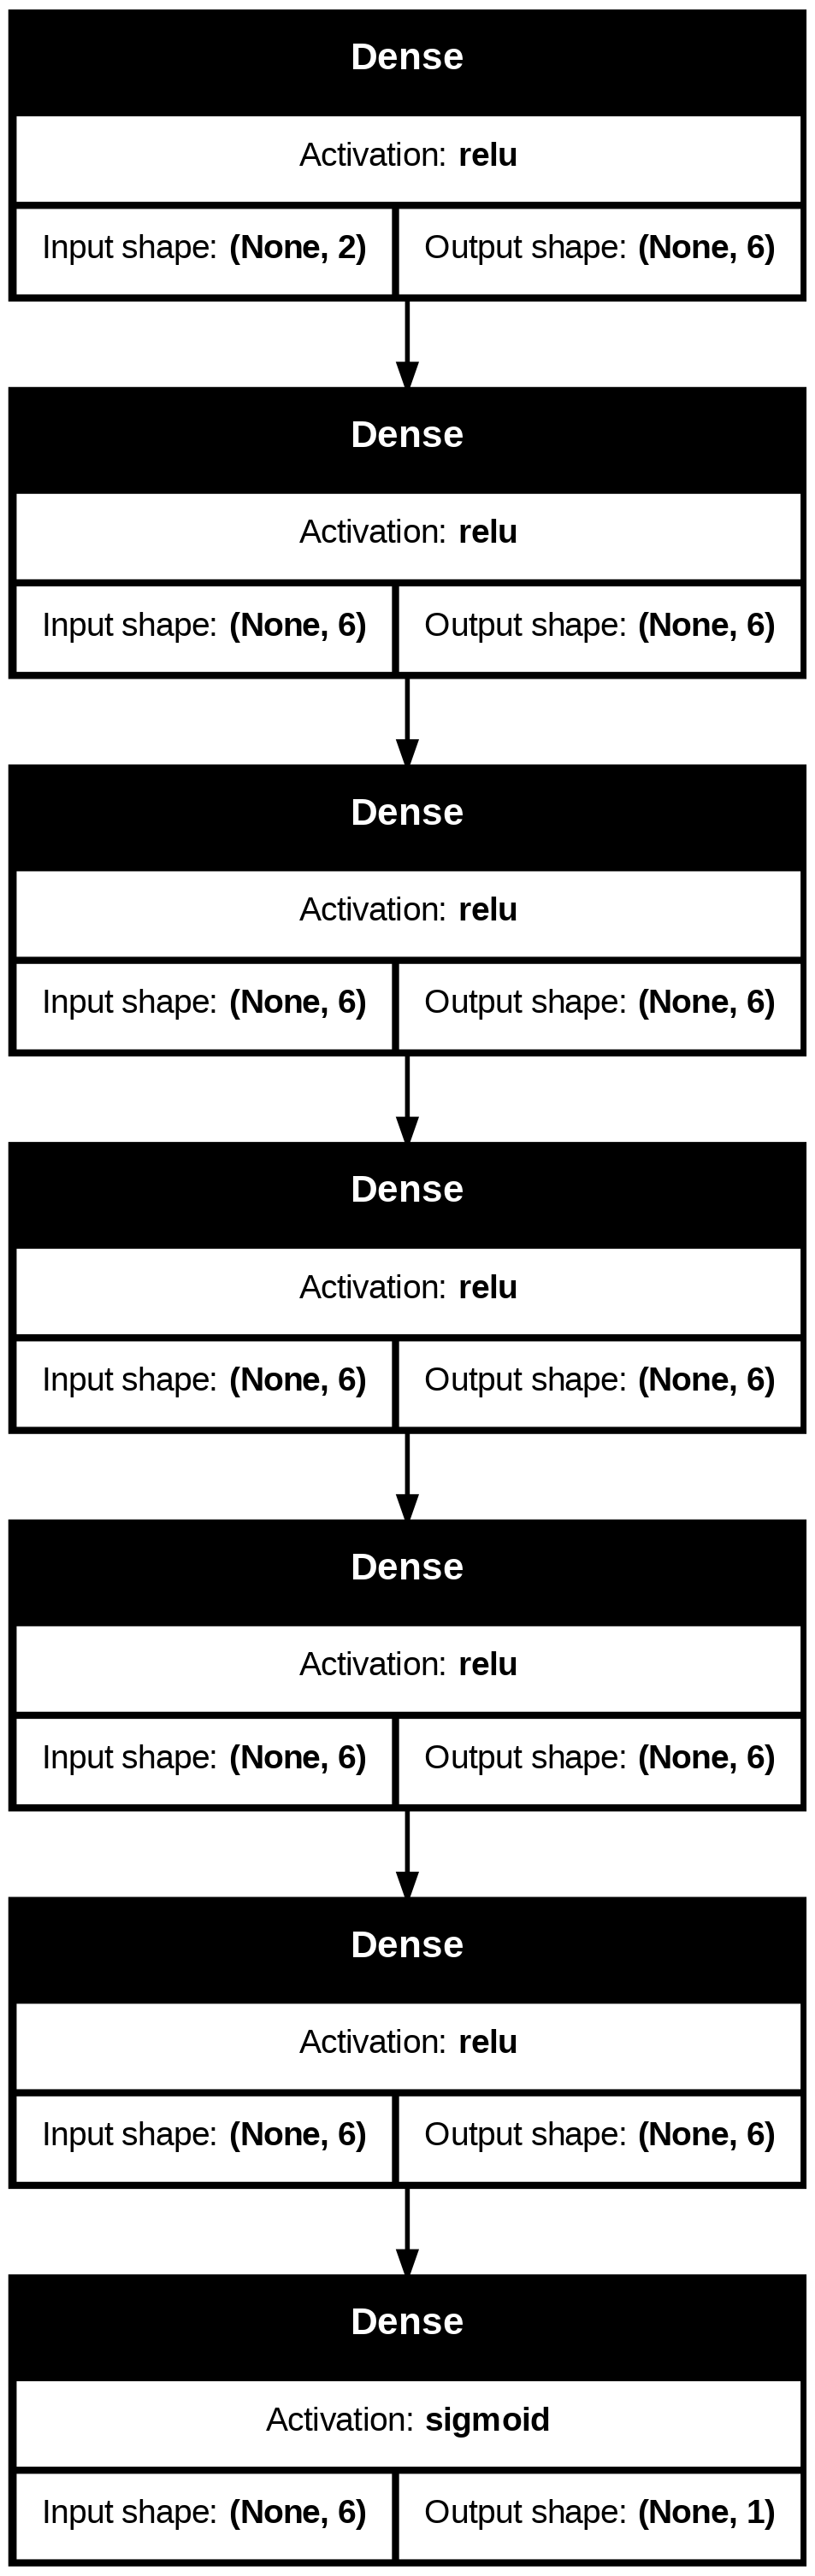

In [59]:
# Plot the model itself
tf.keras.utils.plot_model(model_moon, show_shapes=True, show_layer_activations=True)

In [60]:
# Now we can save our model
model_moon.save('make_moon_model.keras')

In [61]:
new_model = tf.keras.models.load_model('make_moon_model.keras')

In [62]:
# This is the model we just trained and saved just reloaded

# Let's check to see if it is the same model
# Model Architecture

new_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 707 (2.77 KB)

 Trainable params: 235 (940.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 472 (1.85 KB)

In [63]:
model_moon.layers

[<Dense name=dense_14, built=True>,
 <Dense name=dense_15, built=True>,
 <Dense name=dense_16, built=True>,
 <Dense name=dense_17, built=True>,
 <Dense name=dense_18, built=True>,
 <Dense name=dense_19, built=True>,
 <Dense name=dense_20, built=True>]

In [67]:
# Get the patterns of a layer in our network
weights, biases = model_moon.layers[1].get_weights()

# Shapes
weights, weights.shape, biases.shape

(array([[ 0.25328976,  0.80631286,  0.5083659 , -0.38755798,  0.46451768,
         -0.03514095],
        [-0.34033412, -0.23931707,  0.79418176, -0.09556305, -0.8409894 ,
         -0.6344006 ],
        [ 0.57800156,  0.82198143,  0.45883814,  0.79976416,  0.02992829,
          0.37670776],
        [-0.99365884, -0.07942276, -0.27952462,  0.00897665, -0.7283426 ,
         -0.39695105],
        [ 0.49065226,  0.3487139 ,  0.80592656,  0.7134365 ,  0.05127446,
          0.14513536],
        [ 0.50950456, -0.4391081 , -1.1154274 , -0.4795119 ,  0.657046  ,
          0.5446932 ]], dtype=float32),
 (6, 6),
 (6,))

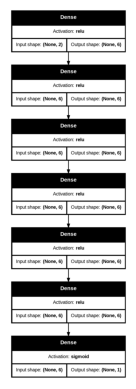

In [77]:
from PIL import Image
img = Image.open('model.png')
plt.imshow(img)
plt.axis(False)
plt.show();

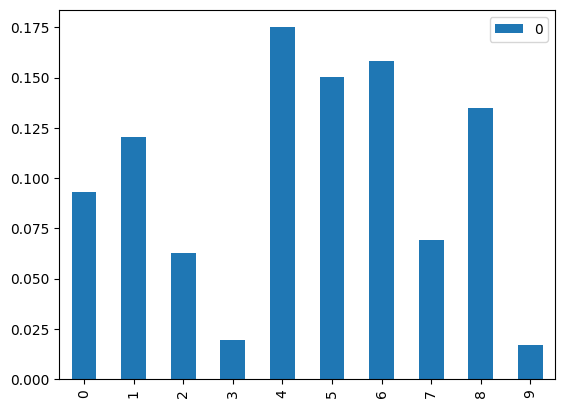

In [108]:
# Trying out softmax

def softmax(logits):
    return tf.exp(logits) / tf.reduce_sum(tf.exp(logits))

n = tf.random.normal(shape=(10,))
pd.DataFrame(softmax(n)).plot(kind='bar');

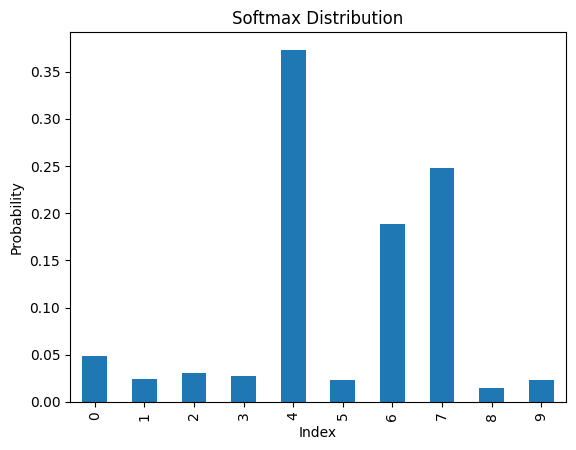

In [107]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

def softmax(logits):
    exp_logits = tf.exp(logits)
    return exp_logits / tf.reduce_sum(exp_logits)

# Generate random logits
n = tf.random.normal(shape=(10,))

# Apply softmax and convert to NumPy for plotting
softmax_values = softmax(n).numpy()

# Plot
pd.DataFrame(softmax_values).plot(kind='bar', legend=False)
plt.title("Softmax Distribution")
plt.xlabel("Index")
plt.ylabel("Probability")
plt.show()
